# Display Image and reference lines



In [1]:
import lsst.daf.persistence

In [10]:
import numpy as np

In [11]:
butler = lsst.daf.persistence.Butler("/projects/HSC/PFS/Subaru/rerun/rhl/sunss2")
calExp = butler.get("calexp", visit=45864, arm="r") 

In [12]:
dir(calExp.getImage())

['Factory',
 '__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__itruediv__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '_get',
 '_set',
 'array',
 'assign',
 'census',
 'clone',
 'convertD',
 'convertDouble',
 'convertF',
 'convertFloat',
 'convertI',
 'convertL',
 'convertU',
 'dtype',
 'getArray',
 'getBBox',
 'getDimensions',
 'getHeight',
 'getId',
 'getNextMemId',
 'getWidth',
 'getX0',
 'getXY0',
 'getY0',
 'indexToPosition',
 'markPersistent',
 'positionToIndex',
 'readFits',
 'readFitsWithOptions',
 'repr',
 'scaledDivides',
 'scaledMinus',
 'scaledMultiplies',
 'scaledPlus',
 'set',
 'setDeleteCallbackId',
 '

In [13]:
np.max(calExp.getImage().getArray())

60587.152

In [14]:
%matplotlib notebook

In [15]:
from lsst.afw.display import Display

In [16]:
Display.setDefaultBackend("matplotlib") # or "ds9"

In [72]:
Display.setDefaultImageColormap('Greys')

In [18]:
butler2 = lsst.daf.persistence.Butler("/projects/HSC/PFS/Subaru/CALIB-SuNSS")

In [19]:
from pfs.drp.stella import DetectorMap

In [20]:
dMap = butler2.get("detectorMap", visit=45864, arm="r", spectrograph=1) 

In [21]:
import numpy as np

In [22]:
from pfs.drp.stella.utils import readLineListFile

In [23]:
refLines = readLineListFile('/tigress/hassans/software/obs_pfs/pfs/lineLists/skyLines.txt', ['OH'])

In [24]:
refLines[0].wavelength

613.8239

In [69]:
wavelength = np.array([rl.wavelength for rl in refLines if rl.guessedIntensity > 10 and rl.wavelength > 600 and rl.wavelength < 900])

In [70]:
wavelength.size

44

<IPython.core.display.Javascript object>


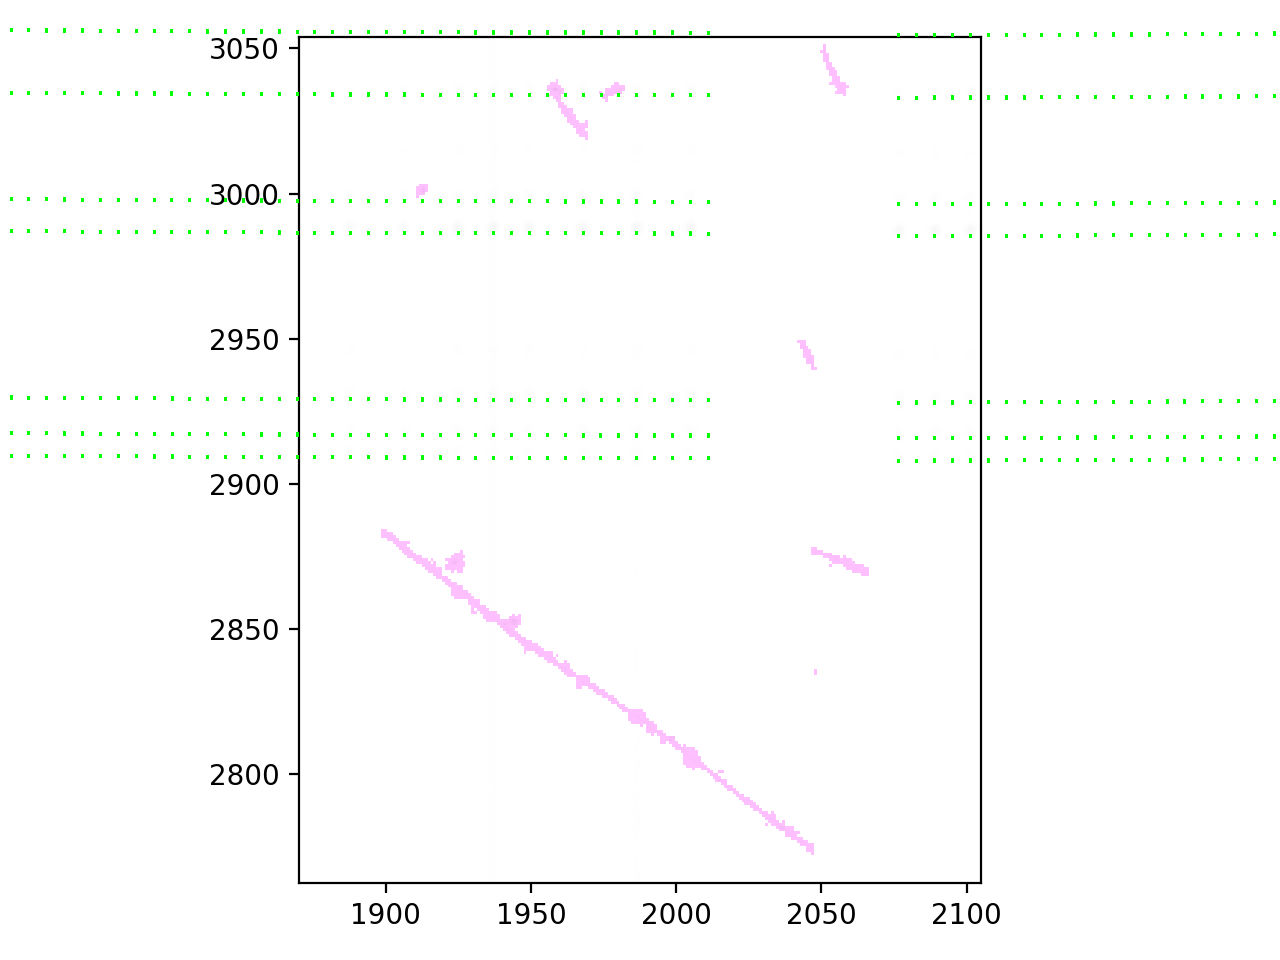

In [74]:
display = Display(1)
display.mtv(calExp)
#dMap.display(display, [300], [800, 810], ctype='blue')
#wavelength=np.array([650, 800.0, 900.0])


for fiber in dMap.fiberId:
    points = dMap.findPoint(fiber, wavelength)
    for xx, yy in points:
        display.dot(".", xx, yy, size=5, ctype='green')

In [ ]:
#f=Display(1)._figure

Load detectormap into object:

In [ ]:
d.display(display, [2,10], [600, 700])

List fiber IDs:

In [ ]:
fiberIds = d.getFiberId()
fiberIds

Get wavelengths for a given fiberId into a list. Each element corresponds to each row (y-coordinate) on the detector. 
That is, w[0] is the wavelength at row 0:

In [ ]:
fiberId = 2
w = d.getWavelength(fiberId)
w

Find the X-coordinate of the center of a fiber on the detector, given the fiberId and the row on the detector:

In [ ]:
d.getXCenter(fiberId, 0)

Get all X-coordinates of the center of the fiber for each row, given the fiberId:

In [ ]:
d.getXCenter(fiberId)

Find the detector coordinates corresponding to the fiberId and wavelength:

In [ ]:
d.findPoint(fiberId, w[0])

In [ ]:
d.getWavelength(2)